# Motorcycle Price Prediction Problem

### Credits and citations:

This dataset contains information about used motorcycles listed on www.bikewale.com

The columns in the given dataset are as follows:

- name
- selling price
- year
- seller type
- owner
- km driven
- ex showroom price

Dataset can be found here: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Datasets/BIKE DETAILS.csv')

In [3]:
dataset.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [8]:
dataset.shape

(1061, 7)

In [7]:
dataset.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [10]:
# % of missing values in target column
percent_missing = dataset['ex_showroom_price'].isnull().sum()/dataset.shape[0]
print(f'Percent of Missing Target values: {round(percent_missing*100, 2)}')

Percent of Missing Target values: 41.0


In [11]:
dataset['name'].nunique()

279

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

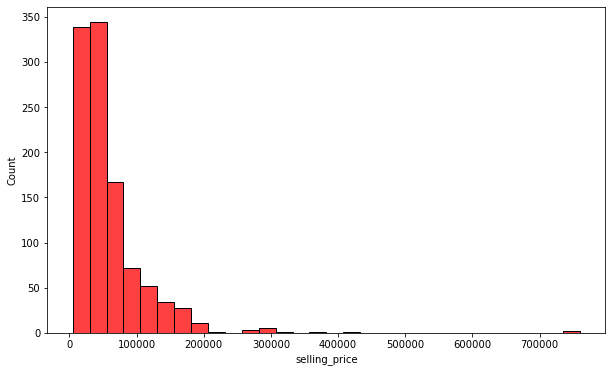

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(dataset['selling_price'],bins=30,color='r')

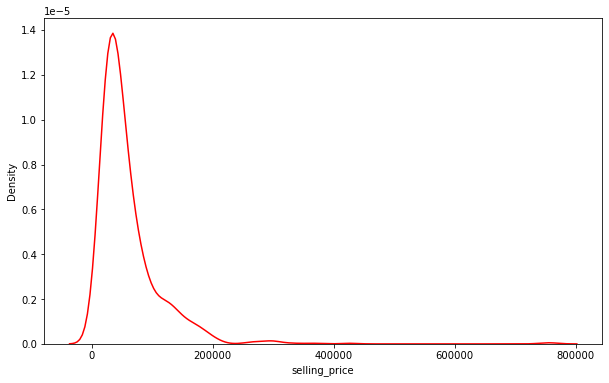

In [26]:
plt.figure(figsize=(10,6))
sns.kdeplot(dataset['selling_price'],color='r');
#ax.set_title('Distribution of insurance charges')

In [27]:
dataset['seller_type'].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

In [28]:
dataset['owner'].value_counts()

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

<AxesSubplot:xlabel='selling_price', ylabel='km_driven'>

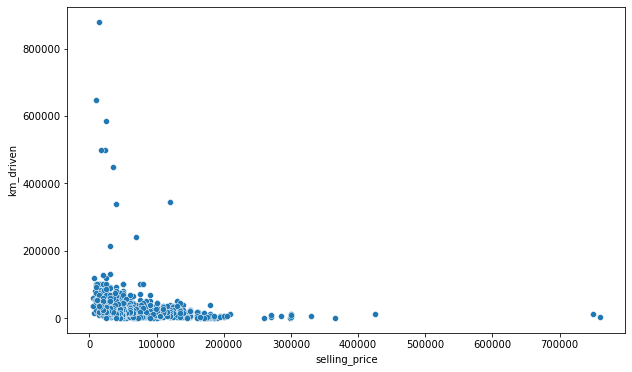

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='selling_price', y='km_driven', data=dataset, palette='viridis')
#plt.set_title('Scatter plot of Vehicle Selling Price vs Kilometers Driven');

In [40]:
df = dataset.loc[(dataset['selling_price'] <= 200000) & (dataset['km_driven'] <= 200000), ['selling_price','km_driven', 'owner']]
df.head()

,selling_price,km_driven,owner
0,175000,350,1st owner
1,45000,5650,1st owner
2,150000,12000,1st owner
3,65000,23000,1st owner
4,20000,21000,2nd owner


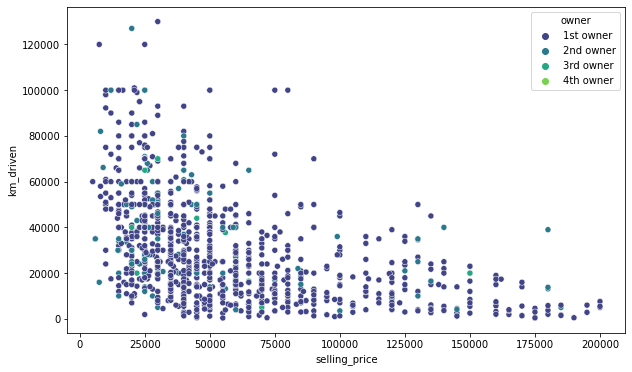

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='selling_price', y='km_driven', data=df, palette='viridis', hue = 'owner');